In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
# Reading the dataset

df=pd.read_excel("./Precision Property Insights.xlsx")

In [3]:
# Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [4]:
# Let's have a look at the first 5 values of the dataset
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [5]:
# Let's create a helper summary function

def summary(dataframe:pd.DataFrame)-> pd.DataFrame:
    '''
    Function to generate a summary of the dataframe including column names, data types, missing values, unique values, and examples of unique values.
    '''
    _data={
        "col_name":[],
        "dtype":[],
        "missing":[],
        "percentage of missing":[],
        "unique":[],
        "example_uniq_val":[]
    }
    cols=dataframe.columns.values
    rows=dataframe.shape[0]
    _data["col_name"].extend(cols)
    _data["dtype"].extend([str(dataframe[i].dtype) for i in cols])
    _data["missing"].extend([int(dataframe[i].isnull().sum()) for i in cols])
    _data["percentage of missing"].extend([dataframe[i].isnull().sum()/rows*100 for i in cols])
    _data["unique"].extend([len(dataframe[i].unique()) for i in cols])
    _data["example_uniq_val"].extend([dataframe[i].dropna().unique()[:3] for i in cols])

    return pd.DataFrame(_data)

In [6]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,cid,int64,0,0.000000,21436,"[3876100940, 3145600250, 7129303070]"
1,dayhours,object,0,0.000000,372,"[20150427T000000, 20150317T000000, 20140820T00..."
2,price,int64,0,0.000000,3625,"[600000, 190000, 735000]"
3,room_bed,float64,108,0.499699,14,"[4.0, 2.0, 3.0]"
4,room_bath,float64,108,0.499699,31,"[1.75, 1.0, 2.75]"
5,living_measure,float64,17,0.078656,1039,"[3050.0, 670.0, 3040.0]"
6,lot_measure,float64,42,0.194327,9766,"[9440.0, 3101.0, 2415.0]"
7,ceil,object,42,0.194327,8,"[1, 2, 3]"
8,coast,object,1,0.004627,4,"[0, 1, $]"
9,sight,float64,57,0.263730,6,"[0.0, 4.0, 2.0]"


In [7]:
'''As per my observation, let's have a look at the columns.
We can drop the irrelevant columns before handling null values and this can be also be done after handling null values '''

# At first, we can drop the cid column

df=df.drop("cid",axis=1)

In [8]:
# Let's handle the missing values

missing_cols=df[[col for col in df.columns if df[col].isnull().sum()>0]].columns.values

In [9]:
# We now have the column names with missing values

missing_cols

array(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area'], dtype=object)

<h3><i><span style="color:cyan">Handling columns sequentially</span></i></h3>

In [10]:
''' Let's make another helper function which will let us know the unique values,
the distribution of the column name and the number of missing values with it's datatype'''

def col_info_check(df:pd.DataFrame, col_name:str, scale=None):
    print(f"Missing value count: {df[col_name].isnull().sum()}")
    print(f"Unique values: {df[col_name].unique()}")
    print(f"dtype: {df[col_name].dtype}")

    if df[col_name].dtype!="object":
        plt.title(f"Distribution of '{col_name}'")
        sns.histplot(df, x=col_name, kde=True, bins=50)
        plt.xlabel(col_name)
        plt.ylabel("Count")
        if scale:
            plt.xticks(range(0, int(df[col_name].max()) + 1, scale))
        plt.xticks(rotation=45)
        plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
        plt.show()

Missing value count: 108
Unique values: [ 4.  2.  3.  1.  5.  6. nan  7. 10.  8.  0.  9. 33. 11.]
dtype: float64


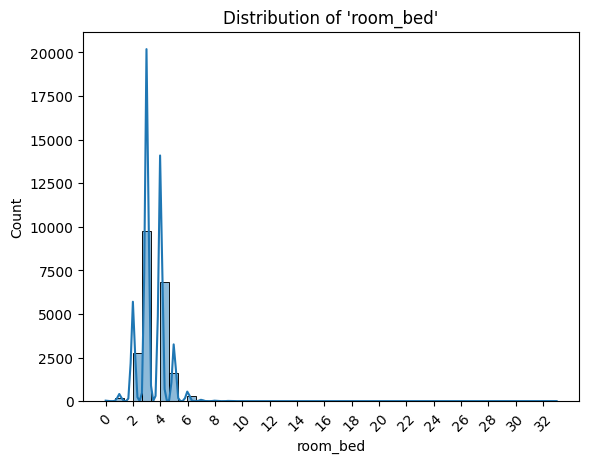

In [11]:
# room_bed

col_info_check(df, "room_bed", 2)

In [12]:
# As we can see, that the number of bedrooms are peaking with room sizes of 3-4 bedrooms and it also has outliers (assumption is >10 bedrooms)

# We can impute it with median or mode

df.loc[df["room_bed"].isnull(), "room_bed"]=df["room_bed"].mode().values[0]

In [13]:
df["room_bed"].unique()

array([ 4.,  2.,  3.,  1.,  5.,  6.,  7., 10.,  8.,  0.,  9., 33., 11.])

Missing value count: 108
Unique values: [1.75 1.   2.75 2.5  1.5  3.5  2.   2.25 3.   4.   3.25 3.75  nan 5.
 0.75 5.5  4.25 4.5  4.75 8.   6.75 5.25 6.   0.   1.25 5.75 7.5  6.5
 0.5  7.75 6.25]
dtype: float64


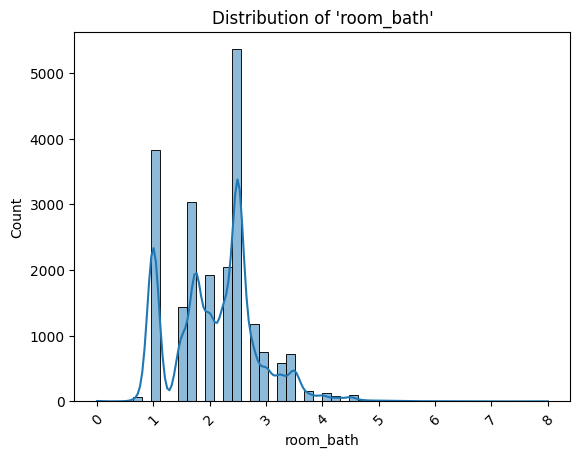

In [14]:
# room_bath

col_info_check(df, "room_bath")

In [15]:
# As we can see, that the room_bath is in decimals, which is not quite possible in the real world scenario. We're gonna round off these values

non_missing_idx=[index for index, item in enumerate(df["room_bath"].isnull()) if item==False]

for i in non_missing_idx:
    df.loc[i, "room_bath"]=np.round(df.loc[i, "room_bath"])

Missing value count: 108
Unique values: [ 2.  1.  3.  4. nan  5.  6.  8.  7.  0.]
dtype: float64


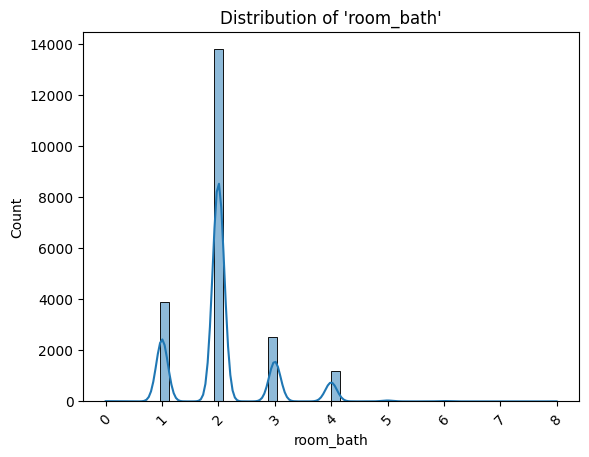

In [16]:
col_info_check(df, "room_bath")

In [17]:
# After visualing, we see that there is a peak of 2 bathrooms, with outliers (assumption >5 bathrooms)

# We can impute it with median or mode

df.loc[df["room_bath"].isnull(), "room_bath"]=df["room_bath"].median()

In [18]:
df["room_bath"].unique()

array([2., 1., 3., 4., 5., 6., 8., 7., 0.])

Missing value count: 17
Unique values: [3050.  670. 3040. ... 1405. 1295. 2253.]
dtype: float64


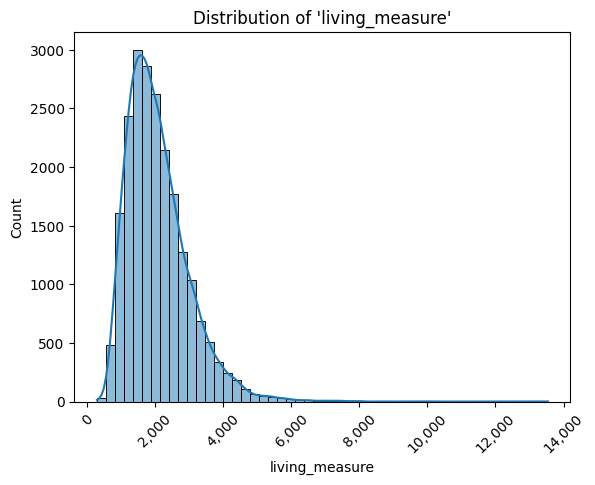

In [19]:
# living_measure and lot_measure

col_info_check(df, "living_measure")

In [20]:
df["living_measure"].head()

0    3050.0
1     670.0
2    3040.0
3    1740.0
4    1120.0
Name: living_measure, dtype: float64

In [21]:
df["lot_measure"].head()

0    9440.0
1    3101.0
2    2415.0
3    3721.0
4    4590.0
Name: lot_measure, dtype: float64

In [22]:
df["total_area"].head()

0    12490
1     3771
2     5455
3     5461
4     5710
Name: total_area, dtype: object

In [23]:
# From above we notice, that total area is actually the sum of living_measure and lot_measure
# We'll check the details for the total area and and drop the other 2 columns as they will be highly correlated to the total_area

col_info_check(df, "total_area")

Missing value count: 29
Unique values: [12490 3771 5455 ... 16111 63597 38122]
dtype: object


In [24]:
# As total area is an object type, let's check for any faulty value as well

set([i for i in df["total_area"] if not isinstance(i,(float, int))])

{'$'}

In [25]:
# We have '$' as a faulty value, let's replace it with nan values

cols_idx_with_faulty_values=[index for index, item in enumerate(df["total_area"]) if item=="$"]

for i in cols_idx_with_faulty_values:
    df.loc[i, "total_area"]=np.nan

In [26]:
df["total_area"]=df["total_area"].astype("float")

In [27]:
df["total_area"].isnull().sum()

np.int64(68)

In [28]:
missing_idx=[index for index, item in enumerate(df["total_area"].isnull()) if item==True]

In [29]:
for i in missing_idx:
    df.loc[i, "total_area"]=df.loc[i, "living_measure"]+df.loc[i, "lot_measure"]

In [30]:
pd.DataFrame({
    "total_area":df["total_area"][missing_idx],
    "sum_living_lot_measure":df["living_measure"][missing_idx]+df["lot_measure"][missing_idx],
    "living_measure":df["living_measure"][missing_idx],
    "lot_measure":df["lot_measure"][missing_idx],
})

,total_area,sum_living_lot_measure,living_measure,lot_measure
128,9852.0,9852.0,1830.0,8022.0
402,8820.0,8820.0,2700.0,6120.0
455,5825.0,5825.0,1700.0,4125.0
578,11685.0,11685.0,2160.0,9525.0
843,11730.0,11730.0,2530.0,9200.0
...,...,...,...,...
19981,7130.0,7130.0,1250.0,5880.0
20199,15153.0,15153.0,2860.0,12293.0
20251,11460.0,11460.0,1140.0,10320.0
21152,10396.0,10396.0,3490.0,6906.0


In [31]:
# Now we're going to drop living and lot measure

# df=df.drop(["living_measure", "lot_measure"], axis=1)

In [32]:
missing_cols

array(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area'], dtype=object)

In [33]:
# ceil

col_info_check(df, "ceil")

Missing value count: 42
Unique values: [1 2 3 1.5 2.5 '$' nan 3.5]
dtype: object


In [34]:
# Replacing faulty values with nan

faulty_idx=[index for index, item in enumerate(df["ceil"]) if item=="$"]

In [35]:
for i in faulty_idx:
    df.loc[i, "ceil"]=np.nan

In [36]:
col_info_check(df, "ceil")

Missing value count: 72
Unique values: [1 2 3 1.5 2.5 nan 3.5]
dtype: object


In [37]:
# As we can see, ceil can be interpreted as number of floors

non_missing_idx=[index for index, item in enumerate(df["ceil"].isnull()) if item==False]

In [38]:
for i in non_missing_idx:
    df.loc[i, "ceil"]=np.round(df.loc[i, "ceil"])

In [39]:
df["ceil"]=df["ceil"].astype("float")

Missing value count: 72
Unique values: [ 1.  2.  3. nan  4.]
dtype: float64


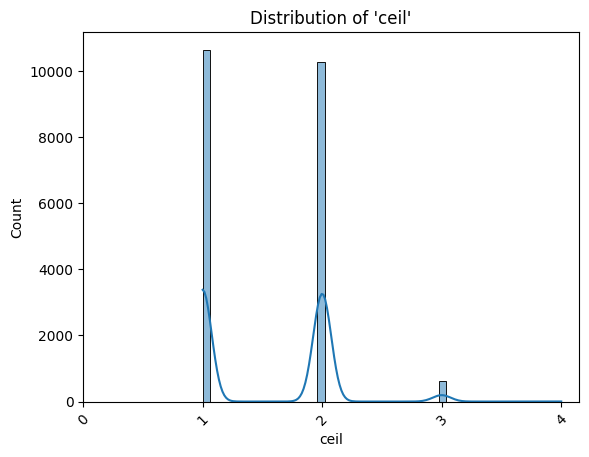

In [40]:
col_info_check(df, "ceil",1)

In [41]:
# As per my observation, there are 2 strong points, ceil 1 and 2
# The best imputation strategy would be to impute it with mode

df.loc[df["ceil"].isnull(), "ceil"]=df["ceil"].mode().values[0]

In [42]:
df["ceil"].isnull().sum()

np.int64(0)

Missing value count: 1
Unique values: [1800.  670. 3040. 1740. 1120. 1610. 1140. 3360. 3100. 1460. 3310. 1520.
 2450. 1390.  910. 1450. 1040. 1200. 1570. 1940. 2170. 1750. 1430. 1220.
 2790.  720. 1180.  950. 2470. 3220.  900. 1420. 1870. 2920. 1100. 1440.
 2360. 3000. 1130. 2156. 1170. 1300. 1340. 2820. 2290. 1070.  800. 1550.
 2200. 1230. 2305. 1270. 1540. 1890. 1060. 1620. 2670. 1980. 1760. 1150.
 1470. 1160. 2270. 3500. 1950.  750. 3290. 3240. 1320. 1769. 1790.  830.
 1290. 1010. 1910. 2110. 2460. 3550. 1330. 1280. 1480. 2040. 2150. 3140.
 1370. 1400. 2740. 2020. 2530. 1260. 3370.  870. 1500. 1240. 1810. 2190.
  890.  630. 1410. 2180. 3460. 4160. 1830. 1380. 1530. 2610. 3180.  880.
 1690. 1930. 1190. 1600. 2240. 2210. 2750. 3440. 1000. 5110. 1757. 1900.
 1050. 3480.  740. 3820. 1990.  970. 1490. 3080. 2390. 2680. 2100.  620.
 7320. 2050.  860. 6050. 1920. 2580. 1210.  810. 1680. 1080. 1560.  700.
  840. 1030. 4140. 2590. 1250. 1660.  710.  730. 1970. 3950. 1590. 1310.
 1580. 2990. 

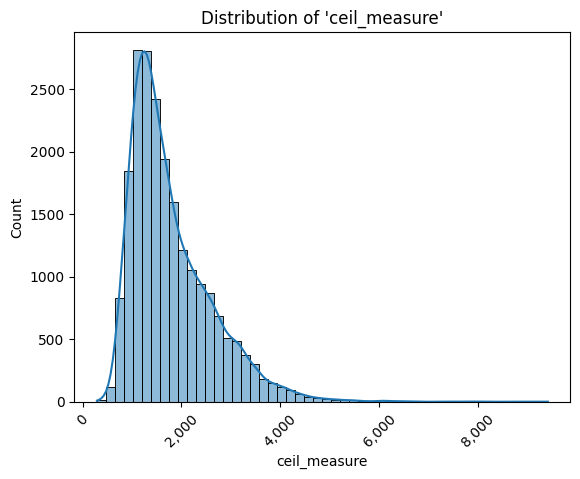

In [43]:
# ceil_measure

col_info_check(df, "ceil_measure")

In [44]:
# We can impute it with median or mode or we can check that, is there a relation between living measure and ceil

idx=202
df["ceil_measure"][idx], df["ceil"][idx], df["living_measure"][idx], df["living_measure"][idx]/df["ceil"][idx]

(np.float64(1290.0), np.float64(1.0), np.float64(2550.0), np.float64(2550.0))

In [45]:
df.loc[df["ceil_measure"].isnull(), "ceil_measure"]=df["ceil_measure"].median()

In [46]:
df["ceil_measure"].isnull().sum()

np.int64(0)

Missing value count: 1
Unique values: [1250.    0. 1320. 1000.  480.  610. 1050.  700.  430.  560.  250.  670.
  570.  290.  600.  680.  380.   50. 1020.  690. 1010.  530. 1370. 1040.
  790.  910.  820. 1850.  500.  760.  960.  340.  800.  580. 1600. 1680.
  900.  420.  450.  200.  240.  950. 1590. 1220. 1500.  710.   80.  140.
 1260.  860.  890.  280.  440.  880.  220. 1650.  630.  780.  810.  300.
  720.  470.  150. 1180. 1060.  120.  660.  400. 1100. 1780.  640. 1170.
 1890.  130.  550.  360.  940.  650. 2730.  870.  730. 1350. 1530. 1540.
  620. 1080. 1900.  770.  520.  920. 1110.  830. 1420.  980.  190.  330.
  350.  740. 1570.  990. 1390.  260.  540. 1300.  265. 1120.  460.  370.
 1830. 1140.  270.  145.  510.  750. 1710.  930. 1870. 1200.  310.  850.
  506.  970. 1070. 1450.  840.   90. 3500. 1380. 1090. 1280. 1240. 3480.
 1210. 1690.   60. 1800. 2400.  180. 4820.  110. 1030. 2060.  143. 1400.
  100. 1270. 2040. 1360. 1740.  590. 1150.   40. 1990. 1340. 1700.  160.
 1290. 1190. 

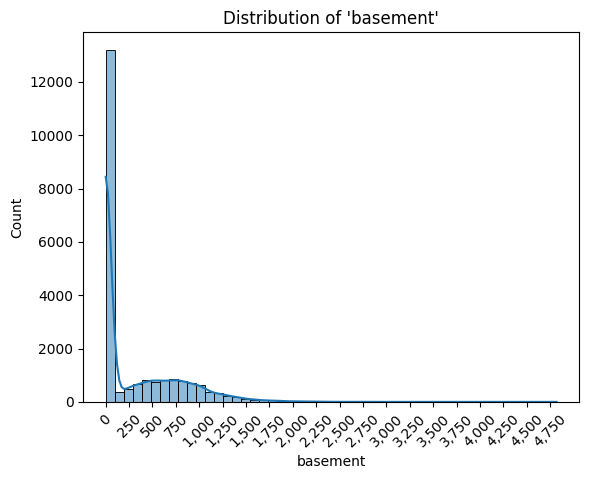

In [47]:
# basement

col_info_check(df, "basement", 250)

In [48]:
# We can see, that there's a huge spike at 0 and a long thin tail towards 2000 and above
# We can change the values to 0 or 1. 0 for no basement and 1 for basement present

df.loc[df["basement"].isnull(), "basement"]=0

In [49]:
df["basement"].isnull().sum()

np.int64(0)

In [50]:
for index, item in enumerate(df["basement"]):
    if item==0:
        df.loc[index, "basement"]=0
    else:
        df.loc[index, "basement"]=1

Missing value count: 0
Unique values: [1. 0.]
dtype: float64


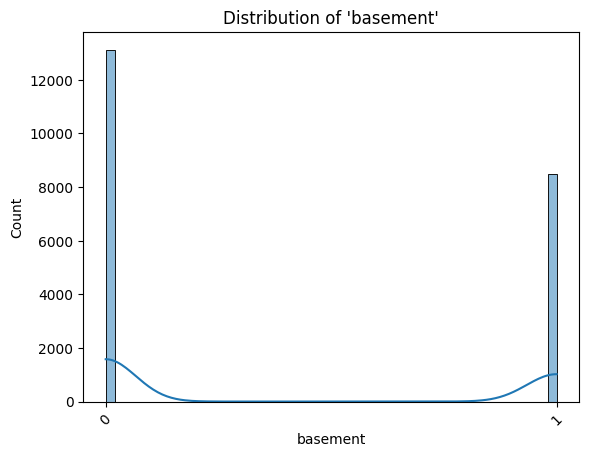

In [51]:
col_info_check(df, "basement", 1)

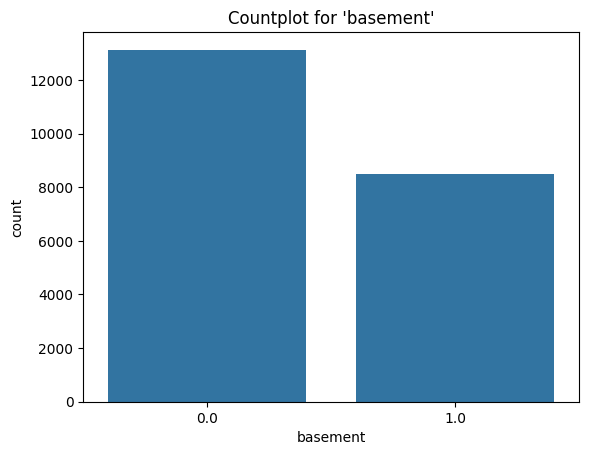

In [52]:
plt.title("Countplot for 'basement'")
sns.countplot(df, x="basement")
plt.show()

In [53]:
col_info_check(df, "yr_built")

Missing value count: 1
Unique values: [1966 1948 2009 1924 1994 2005 1978 1983 2012 1912 1990 1967 1919 1908
 1950 2000 2013 1943 1922 1977 2004 1935 1964 1945 1987 2008 1940 2003
 1988 1985 1998 1995 1946 1984 1958 1963 1942 2014 1971 1936 1954 1923
 2002 1972 2007 1930 1962 1999 1953 1965 2010 1997 2006 1979 1996 1992
 1968 1980 1981 1969 2001 1929 1952 1916 1976 1974 1920 1931 1975 1960
 1900 '$' 1986 1989 1906 1955 1956 1915 1941 1993 2011 1925 1947 1991 1926
 1927 1951 1961 1932 1917 1928 1959 1921 1911 1949 1982 1913 1957 1914
 1938 1973 1937 1944 1970 1901 1907 1939 1918 1934 1904 2015 1909 1910
 1905 1902 1933 1903 nan]
dtype: object


In [54]:
faulty_idx=[index for index, item in enumerate(df["yr_built"]) if item=="$"]

for i in faulty_idx:
    df.loc[i, "yr_built"]=np.nan

In [55]:
df["yr_built"].isnull().sum()

np.int64(15)

In [56]:
df["yr_built"].median()

np.float64(1975.0)

In [57]:
df.groupby("condition")["yr_built"].median()

condition
1    1928.0
2    1950.0
3    1988.0
4    1962.0
5    1950.0
$    1978.5
Name: yr_built, dtype: object

In [58]:
missing_idx=[index for index, item in enumerate(df["yr_built"].isnull()) if item==True]

In [59]:
pd.DataFrame({
    "condition":df["condition"][missing_idx],
    "yr_built":df["yr_built"][missing_idx]
})

,condition,yr_built
131,3,NaN
1841,4,NaN
1906,3,NaN
2407,3,NaN
2974,3,NaN
4529,3,NaN
5351,3,NaN
8205,3,NaN
13562,5,NaN
13581,3,NaN


In [60]:
for i in missing_idx:
    cond=df.loc[i, "condition"]
    if pd.notna(cond):
        df.loc[i , "yr_built"]=df.groupby("condition")["yr_built"].median()[df["condition"][i]]
    else:
        df.loc[i, "yr_built"]=df["yr_built"].median()

In [61]:
pd.DataFrame({
    "condition":df["condition"][missing_idx],
    "yr_built":df["yr_built"][missing_idx]
})

,condition,yr_built
131,3,1988.0
1841,4,1962.0
1906,3,1988.0
2407,3,1988.0
2974,3,1988.0
4529,3,1988.0
5351,3,1988.0
8205,3,1988.0
13562,5,1950.0
13581,3,1988.0


In [62]:
missing_cols=df[[col for col in df.columns if df[col].isnull().sum()>0]].columns.values

In [63]:
missing_cols

array(['living_measure', 'lot_measure', 'coast', 'sight', 'condition',
       'quality', 'living_measure15', 'lot_measure15', 'furnished'],
      dtype=object)

In [64]:
# condition

col_info_check(df, "condition")

Missing value count: 57
Unique values: [3 4 5 2 nan 1 '$']
dtype: object


In [65]:
faulty_idx=[index for index, item in enumerate(df["condition"]) if item=="$"]

In [66]:
df.loc[faulty_idx, "condition"]=np.nan

In [67]:
col_info_check(df, "condition")

Missing value count: 85
Unique values: [3 4 5 2 nan 1]
dtype: object


In [68]:
missing_idx=[index for index, item in enumerate(df["condition"].isnull()) if item == True]

In [69]:
len(missing_idx)

85

In [70]:
df.groupby("yr_built")["condition"].median()

yr_built
1900    3.0
1901    4.0
1902    3.0
1903    3.0
1904    4.0
       ... 
2011    3.0
2012    3.0
2013    3.0
2014    3.0
2015    3.0
Name: condition, Length: 116, dtype: object

In [71]:
df["yr_built"]=df["yr_built"].astype(int)

In [72]:
for i in missing_idx:
    df.loc[i, "condition"]=df.groupby("yr_built")["condition"].median()[df["yr_built"][i]]

In [73]:
df["condition"]=df["condition"].astype("int")

Missing value count: 1
Unique values: [ 8.  6.  7. 10.  9.  5. 11. 13.  4. 12.  1.  3. nan]
dtype: float64


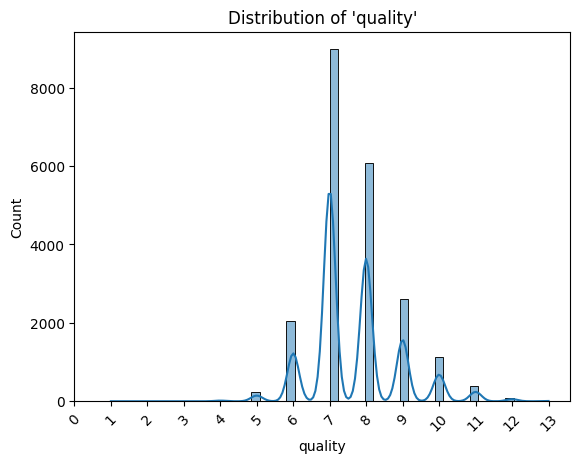

In [74]:
# quality

col_info_check(df, "quality", 1)

In [75]:
# Imputing missing values with median

df.loc[df["quality"].isnull(), "quality"]=df["quality"].median()

Missing value count: 0
Unique values: [ 8.  6.  7. 10.  9.  5. 11. 13.  4. 12.  1.  3.]
dtype: float64


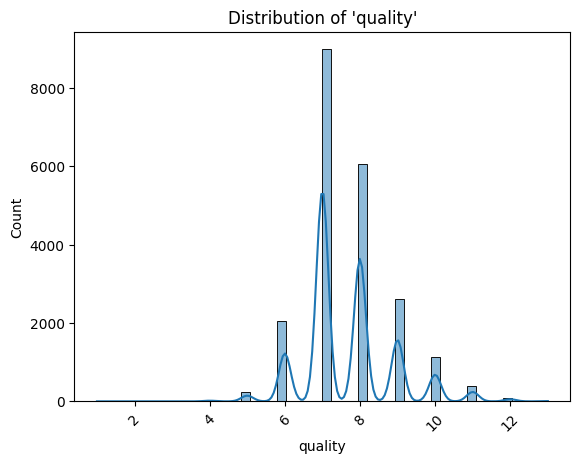

In [76]:
col_info_check(df, "quality")

In [77]:
missing_cols

array(['living_measure', 'lot_measure', 'coast', 'sight', 'condition',
       'quality', 'living_measure15', 'lot_measure15', 'furnished'],
      dtype=object)

Missing value count: 29
Unique values: [ 0.  1. nan]
dtype: float64


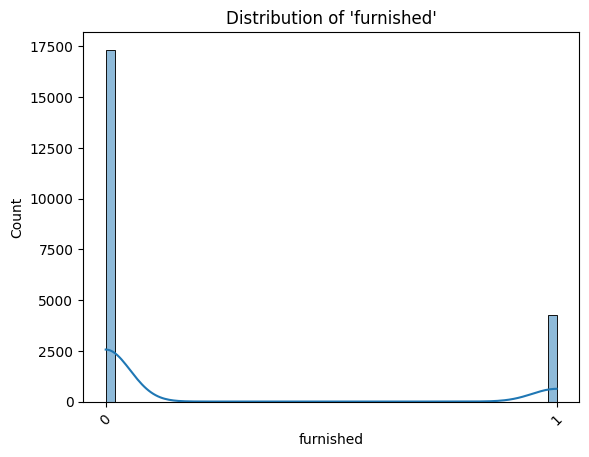

In [78]:
# furnished

col_info_check(df, "furnished",1)

In [79]:
df['furnished'].value_counts(dropna=False)


furnished
0.0    17338
1.0     4246
NaN       29
Name: count, dtype: int64

In [80]:
# We'll impute it with mode

df.loc[df["furnished"].isnull(), "furnished"]=df["furnished"].mode().values[0]

In [81]:
missing_cols

array(['living_measure', 'lot_measure', 'coast', 'sight', 'condition',
       'quality', 'living_measure15', 'lot_measure15', 'furnished'],
      dtype=object)

Missing value count: 166
Unique values: [2020. 1660. 2620. 2030. 1120. 1610. 1170. 2800. 1850. 1460. 2380. 1880.
 2440. 1390. 1060. 1280. 1540. 1200. 3050. 1410. 2300. 1440. 1710. 2850.
 1860. 1830. 1550. 2490. 3330. 1350. 2040. 3100. 1790. 2420. 3000. 1870.
 1730. 1708. 1670. 1510. 1480. 2820. 1090. 1160. 1220. 2710. 1240. 1320.
 2120. 1500. 1450. 2400. 2050. 1380. 2070. 1820. 1620. 1268. 2260. 3110.
 1890. 1260. 3380. 1680. 2502. 1340. 1800. 1180. 2650. 2450. 3730. 2110.
 2990. 3920. 2330. 2060. 2520. 1330. 1780. 2150. 2790. 2080. 1650. 2530.
 1760. 2900.  870. 1770. 2190. 1270. 3140. 1140. 1720. 2214. 3340. 2540.
 3400.   nan 2610. 1400. 3130. 1530. 1690. 2580. 1990. 3390. 3800. 2140.
  910. 1560. 1150. 4110. 2510. 1050. 3360. 1490. 3010. 2130. 3450. 2740.
 2200. 2100. 2360. 1580. 3630. 1100. 1020. 1930. 3270. 2310. 1250. 4210.
 2170. 2220. 3420. 1940. 1570. 2460.  980. 1810. 2270. 1840. 1470.  920.
 1630.  840. 1520. 1590. 1740. 1300. 1010. 1080. 2340. 2430. 3070. 1230.
 2350. 3160

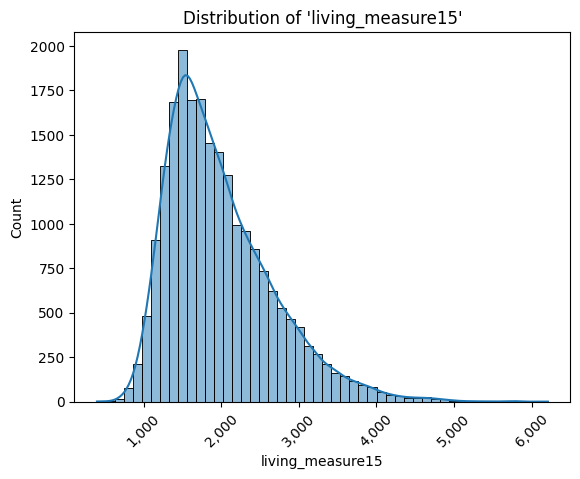

In [82]:
# living_measure 15

col_info_check(df, "living_measure15")

In [83]:
df.loc[df["living_measure15"].isnull(), "living_measure15"]=df["living_measure15"].median()

Missing value count: 29
Unique values: [ 8660.  4100.  2433. ... 11491.  2853.  7604.]
dtype: float64


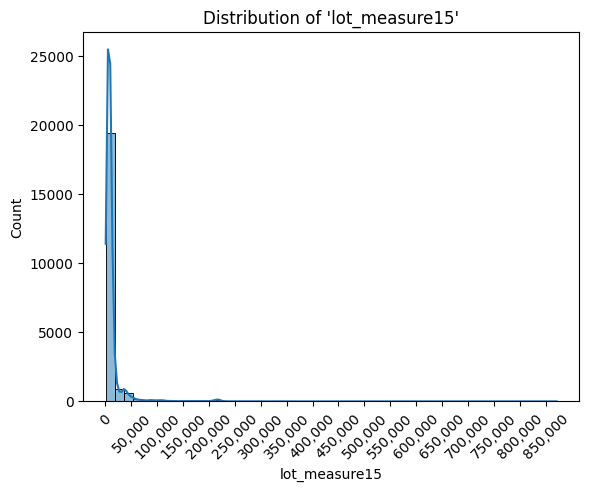

In [84]:
# lot_measure15

col_info_check(df, "lot_measure15", 50_000)

In [85]:
df.loc[df["lot_measure15"].isnull(), "lot_measure15"]=df["lot_measure15"].median()

In [86]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,dayhours,object,0,0.000000,372,"[20150427T000000, 20150317T000000, 20140820T00..."
1,price,int64,0,0.000000,3625,"[600000, 190000, 735000]"
2,room_bed,float64,0,0.000000,13,"[4.0, 2.0, 3.0]"
3,room_bath,float64,0,0.000000,9,"[2.0, 1.0, 3.0]"
4,living_measure,float64,17,0.078656,1039,"[3050.0, 670.0, 3040.0]"
5,lot_measure,float64,42,0.194327,9766,"[9440.0, 3101.0, 2415.0]"
6,ceil,float64,0,0.000000,4,"[1.0, 2.0, 3.0]"
7,coast,object,1,0.004627,4,"[0, 1, $]"
8,sight,float64,57,0.263730,6,"[0.0, 4.0, 2.0]"
9,condition,int64,0,0.000000,5,"[3, 4, 5]"


Missing value count: 57
Unique values: [ 0.  4.  2.  3.  1. nan]
dtype: float64


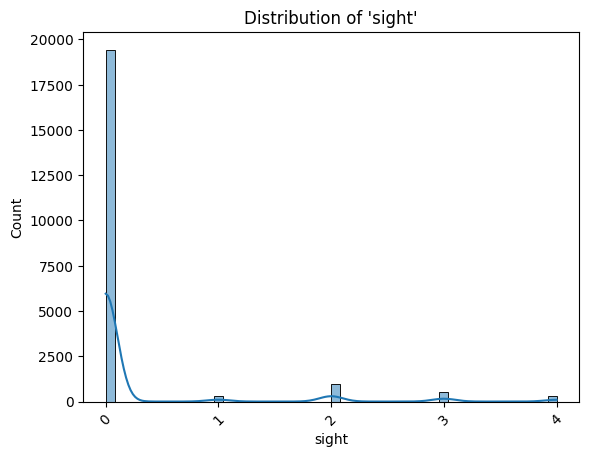

In [87]:
# sight

col_info_check(df, "sight",1)

In [88]:
df.loc[df["sight"].isnull(), "sight"]=df["sight"].mode().values[0]

In [89]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,dayhours,object,0,0.000000,372,"[20150427T000000, 20150317T000000, 20140820T00..."
1,price,int64,0,0.000000,3625,"[600000, 190000, 735000]"
2,room_bed,float64,0,0.000000,13,"[4.0, 2.0, 3.0]"
3,room_bath,float64,0,0.000000,9,"[2.0, 1.0, 3.0]"
4,living_measure,float64,17,0.078656,1039,"[3050.0, 670.0, 3040.0]"
5,lot_measure,float64,42,0.194327,9766,"[9440.0, 3101.0, 2415.0]"
6,ceil,float64,0,0.000000,4,"[1.0, 2.0, 3.0]"
7,coast,object,1,0.004627,4,"[0, 1, $]"
8,sight,float64,0,0.000000,5,"[0.0, 4.0, 2.0]"
9,condition,int64,0,0.000000,5,"[3, 4, 5]"


Missing value count: 17
Unique values: [3050.  670. 3040. ... 1405. 1295. 2253.]
dtype: float64


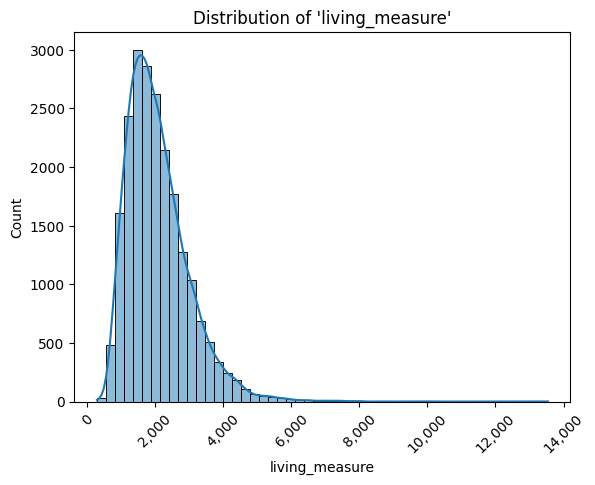

In [90]:
# living_measure

col_info_check(df, "living_measure")

In [91]:
missing_idx=[index for index, item in enumerate(df["living_measure"].isnull()) if item==True]

In [92]:
len(missing_idx)

17

In [93]:
for i in missing_idx:
    lot_measure=pd.notna(df["lot_measure"][i])
    if lot_measure:
        df.loc[i, "living_measure"]=df.loc[i, "total_area"]-df.loc[i, "lot_measure"]

Missing value count: 0
Unique values: [3050.  670. 3040. ... 1405. 1295. 2253.]
dtype: float64


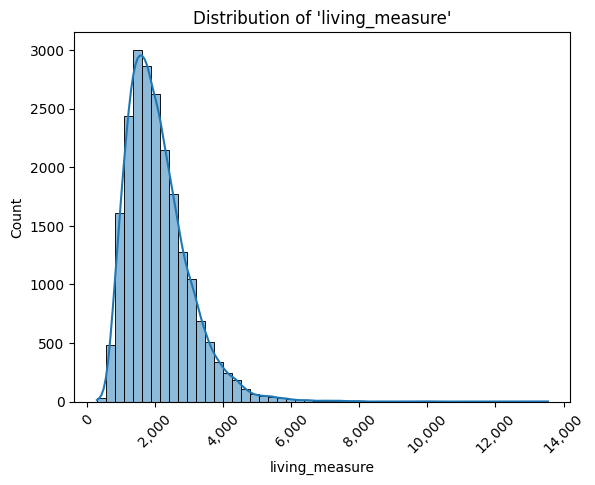

In [94]:
col_info_check(df, "living_measure")

In [95]:
# lot_measure

missing_idx=[index for index, item in enumerate(df["lot_measure"].isnull()) if item==True]

In [96]:
len(missing_idx)

42

In [97]:
for i in missing_idx:
    df.loc[i, "lot_measure"]=df.loc[i, "total_area"]-df.loc[i, "living_measure"]

In [98]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,dayhours,object,0,0.000000,372,"[20150427T000000, 20150317T000000, 20140820T00..."
1,price,int64,0,0.000000,3625,"[600000, 190000, 735000]"
2,room_bed,float64,0,0.000000,13,"[4.0, 2.0, 3.0]"
3,room_bath,float64,0,0.000000,9,"[2.0, 1.0, 3.0]"
4,living_measure,float64,0,0.000000,1038,"[3050.0, 670.0, 3040.0]"
5,lot_measure,float64,0,0.000000,9782,"[9440.0, 3101.0, 2415.0]"
6,ceil,float64,0,0.000000,4,"[1.0, 2.0, 3.0]"
7,coast,object,1,0.004627,4,"[0, 1, $]"
8,sight,float64,0,0.000000,5,"[0.0, 4.0, 2.0]"
9,condition,int64,0,0.000000,5,"[3, 4, 5]"


In [99]:
# coast

faulty_idx=[index for index, item in enumerate(df["coast"]) if item == "$"]

In [100]:
df.loc[faulty_idx, "coast"]=np.nan

In [101]:
df["coast"]=df["coast"].astype("float")

Missing value count: 31
Unique values: [ 0.  1. nan]
dtype: float64


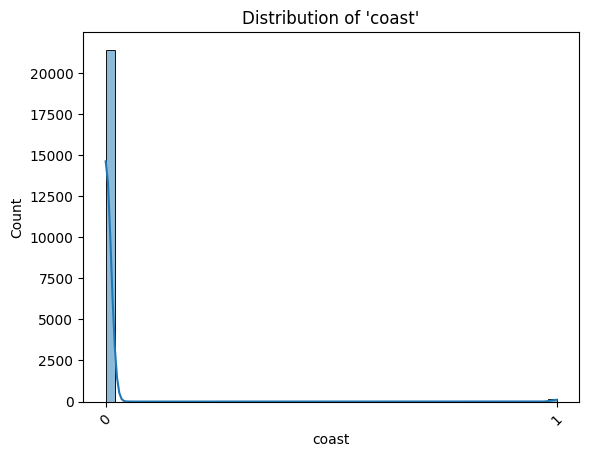

In [102]:
col_info_check(df, "coast",1)

In [103]:
df.loc[df["coast"].isnull(), "coast"]=df["coast"].mode().values[0]

In [104]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,dayhours,object,0,0.0,372,"[20150427T000000, 20150317T000000, 20140820T00..."
1,price,int64,0,0.0,3625,"[600000, 190000, 735000]"
2,room_bed,float64,0,0.0,13,"[4.0, 2.0, 3.0]"
3,room_bath,float64,0,0.0,9,"[2.0, 1.0, 3.0]"
4,living_measure,float64,0,0.0,1038,"[3050.0, 670.0, 3040.0]"
5,lot_measure,float64,0,0.0,9782,"[9440.0, 3101.0, 2415.0]"
6,ceil,float64,0,0.0,4,"[1.0, 2.0, 3.0]"
7,coast,float64,0,0.0,2,"[0.0, 1.0]"
8,sight,float64,0,0.0,5,"[0.0, 4.0, 2.0]"
9,condition,int64,0,0.0,5,"[3, 4, 5]"


<h3><i><span style="color:cyan">Feature Selection</span></i></h3>

In [105]:
# Lets drop, lat and long first

df=df.drop(["lat","long"],axis=1)

In [106]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,dayhours,object,0,0.0,372,"[20150427T000000, 20150317T000000, 20140820T00..."
1,price,int64,0,0.0,3625,"[600000, 190000, 735000]"
2,room_bed,float64,0,0.0,13,"[4.0, 2.0, 3.0]"
3,room_bath,float64,0,0.0,9,"[2.0, 1.0, 3.0]"
4,living_measure,float64,0,0.0,1038,"[3050.0, 670.0, 3040.0]"
5,lot_measure,float64,0,0.0,9782,"[9440.0, 3101.0, 2415.0]"
6,ceil,float64,0,0.0,4,"[1.0, 2.0, 3.0]"
7,coast,float64,0,0.0,2,"[0.0, 1.0]"
8,sight,float64,0,0.0,5,"[0.0, 4.0, 2.0]"
9,condition,int64,0,0.0,5,"[3, 4, 5]"


In [107]:
# dayhours only has date object and no time, so we won't be deriving any meaningful insights, so let's drop it

df=df.drop("dayhours", axis=1)

In [108]:
# Let's make a new age column

current_yr=2025

df["age"]=current_yr-df["yr_built"]

In [109]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,price,int64,0,0.0,3625,"[600000, 190000, 735000]"
1,room_bed,float64,0,0.0,13,"[4.0, 2.0, 3.0]"
2,room_bath,float64,0,0.0,9,"[2.0, 1.0, 3.0]"
3,living_measure,float64,0,0.0,1038,"[3050.0, 670.0, 3040.0]"
4,lot_measure,float64,0,0.0,9782,"[9440.0, 3101.0, 2415.0]"
5,ceil,float64,0,0.0,4,"[1.0, 2.0, 3.0]"
6,coast,float64,0,0.0,2,"[0.0, 1.0]"
7,sight,float64,0,0.0,5,"[0.0, 4.0, 2.0]"
8,condition,int64,0,0.0,5,"[3, 4, 5]"
9,quality,float64,0,0.0,12,"[8.0, 6.0, 7.0]"


In [110]:
# correlation between yr_built and  age

df[["age","yr_built"]].corr()

,age,yr_built
age,1.0,-1.0
yr_built,-1.0,1.0


In [111]:
# It has a perfectly inverse correlation, let's drop the yr_built column as well

df=df.drop("yr_built", axis=1)

In [112]:
summary(df)

,col_name,dtype,missing,percentage of missing,unique,example_uniq_val
0,price,int64,0,0.0,3625,"[600000, 190000, 735000]"
1,room_bed,float64,0,0.0,13,"[4.0, 2.0, 3.0]"
2,room_bath,float64,0,0.0,9,"[2.0, 1.0, 3.0]"
3,living_measure,float64,0,0.0,1038,"[3050.0, 670.0, 3040.0]"
4,lot_measure,float64,0,0.0,9782,"[9440.0, 3101.0, 2415.0]"
5,ceil,float64,0,0.0,4,"[1.0, 2.0, 3.0]"
6,coast,float64,0,0.0,2,"[0.0, 1.0]"
7,sight,float64,0,0.0,5,"[0.0, 4.0, 2.0]"
8,condition,int64,0,0.0,5,"[3, 4, 5]"
9,quality,float64,0,0.0,12,"[8.0, 6.0, 7.0]"


<h3><i><span style="color:cyan">Outlier treatment</span></i></h3>

In [113]:
def IQR(df:pd.DataFrame, col:str):
    outliers=[]

    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)

    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR

    for i in df[col]:
        if i<lower_bound and i>upper_bound:
            outliers.append(i)
    return outliers

In [114]:
numeric_cols = [
    'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
    'coast', 'sight', 'condition', 'quality', 'ceil_measure',
    'basement', 'living_measure15', 'lot_measure15',
    'furnished', 'total_area', 'age'
]


In [115]:
for col in numeric_cols:
    print(IQR(df, col))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


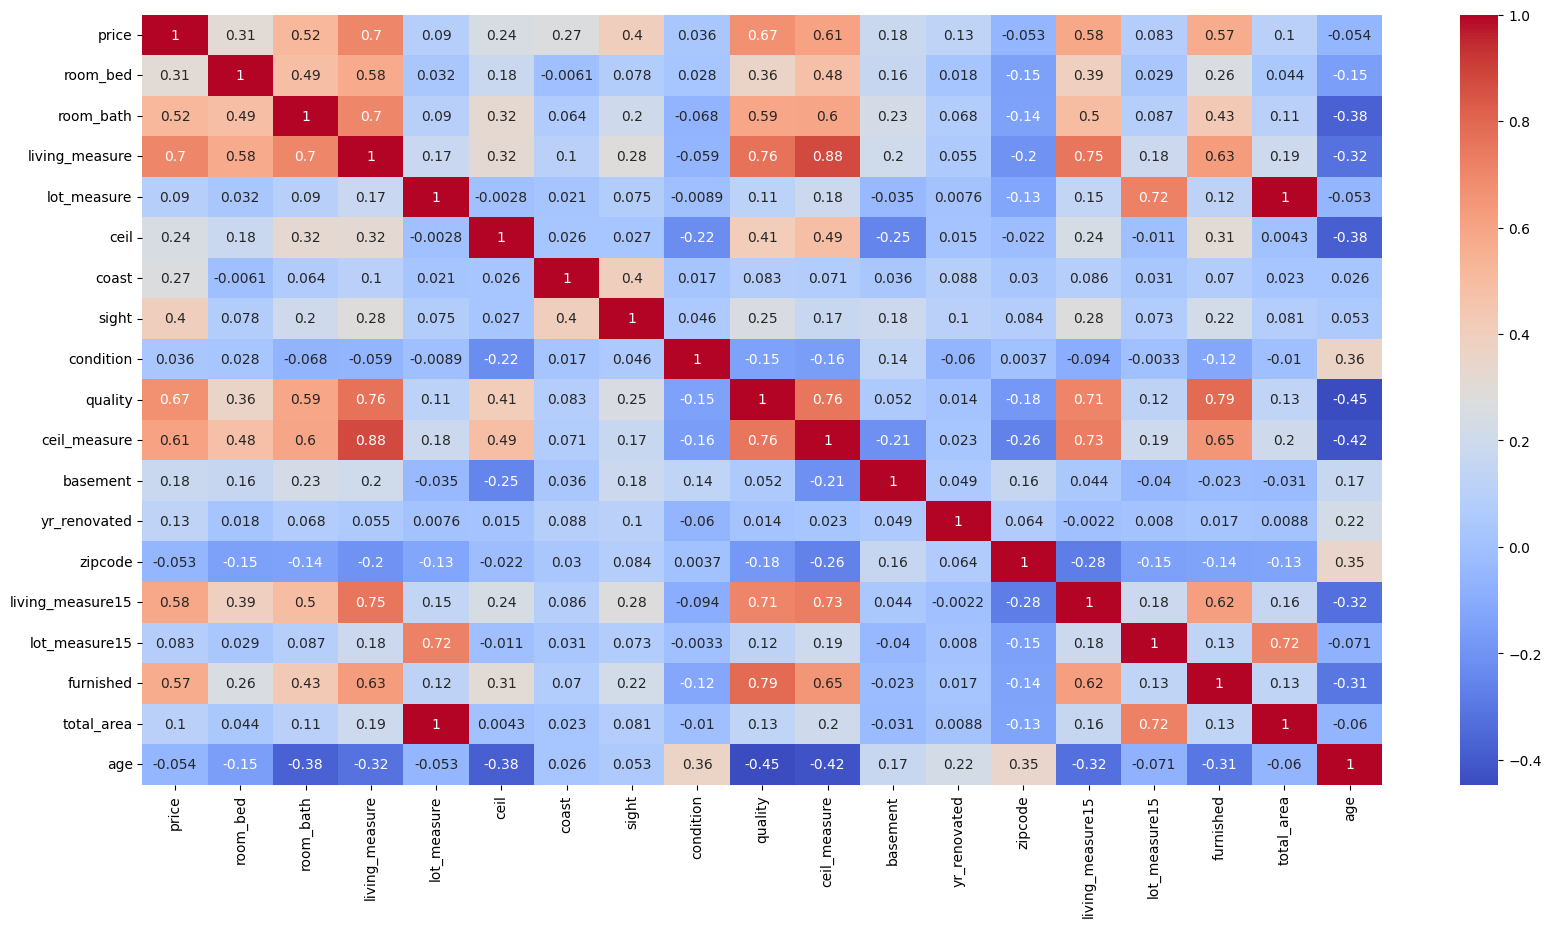

In [116]:
# We need to check columns for higher correlation

corr=df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [117]:
correlation=[]

threshold=0.80

for i in corr:
    for j in corr:
        if abs(corr.loc[i,j])>=threshold and i!=j:
            correlation.append((i,j, f"{float(corr.loc[i,j]):.3f}"))

In [118]:
correlation

[('living_measure', 'ceil_measure', '0.877'),
 ('lot_measure', 'total_area', '1.000'),
 ('ceil_measure', 'living_measure', '0.877'),
 ('total_area', 'lot_measure', '1.000')]

In [119]:
# Let's remove the highly correlated columns

cols_to_remove=[
    'total_area', 'ceil_measure'
]

df=df.drop(cols_to_remove, axis=1)

In [120]:
# As we saw, that there are no outliers in the continuous numerical columns. So we can continue with Feature Scaling

cols_to_scale = [
    'living_measure', 'lot_measure',  'basement',
    'living_measure15', 'lot_measure15', 'age'
]

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc=StandardScaler()

In [123]:
# We'll be making a new dataframe with scaled data

df_scaled=df.copy(deep=True)

In [124]:
df_scaled[cols_to_scale]=sc.fit_transform(df[cols_to_scale])

In [125]:
df_scaled.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,basement,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,age
0,600000,4.0,2.0,1.056271,-0.136819,1.0,0.0,0.0,3,8.0,1.243624,0,98034,0.049875,-0.150342,0.0,0.170785
1,190000,2.0,1.0,-1.535137,-0.289862,1.0,0.0,0.0,4,6.0,-0.804102,0,98118,-0.477222,-0.317567,0.0,0.783752
2,735000,4.0,3.0,1.045383,-0.306425,2.0,1.0,4.0,3,8.0,-0.804102,0,98118,0.928369,-0.378699,0.0,0.170785
3,257000,3.0,2.0,-0.370092,-0.274894,2.0,0.0,0.0,3,8.0,-0.804102,0,98002,0.064517,-0.328789,0.0,-1.293524
4,450000,2.0,1.0,-1.045165,-0.253913,1.0,0.0,0.0,3,7.0,-0.804102,0,98118,-1.267867,-0.280895,0.0,1.601041


<h3><i><span style="color:cyan">Model Building</span></i></h3>

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [127]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

In [128]:
# let's split the data to training and testing data

from sklearn.model_selection import train_test_split

In [129]:
# Let's make helper function for telling the model stats

def stats(y_train,y_test , y_pred_train, y_pred_test)->dict[str, int]:
    train_mse=mean_squared_error(y_train, y_pred_train)
    train_rmse=root_mean_squared_error(y_train, y_pred_train)
    train_r_squared=r2_score(y_train, y_pred_train)
    
    test_mse=mean_squared_error(y_test, y_pred_test)
    test_rmse=root_mean_squared_error(y_test, y_pred_test)
    test_r_squared=r2_score(y_test, y_pred_test)

    return {
        "train_mse":train_mse,
        "train_rmse":train_rmse,
        "train_r_squared":train_r_squared,
        "test_mse":test_mse,
        "test_rmse":test_rmse,
        "test_r_squared":test_r_squared
    }


In [130]:
model_data={
    "LinearRegression":[],
    "DecisionTreeRegressor":[],
    "RandomForestRegressor":[],
    "XGBRegressor":[]
}

In [131]:
x=df.drop("price",axis=1)
y=df["price"]

x_scaled=df_scaled.drop("price", axis=1)
y_scaled=df_scaled["price"]

In [132]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)
x_train_scaled, x_test_scaled, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [133]:
lr=LinearRegression()

In [134]:
lr.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
y_pred_train_scaled=lr.predict(x_train)
y_pred_test_scaled=lr.predict(x_test)

In [136]:
y_pred_train_scaled=[f"{i:.3f}" for i in y_pred_train_scaled]
y_pred_test_scaled=[f"{i:.3f}" for i in y_pred_test_scaled]

In [137]:
lr_stats=stats(y_train, y_test, y_pred_train_scaled, y_pred_test_scaled)

In [138]:
# Decision Tree Regressor

dt=DecisionTreeRegressor()

In [139]:
dt.fit(x_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [140]:
y_pred_train_scaled=dt.predict(x_train_scaled)
y_pred_test_scaled=dt.predict(x_test_scaled)

In [141]:
dt_stats=stats(y_train, y_test, y_pred_train_scaled, y_pred_test_scaled)

In [142]:
# Random Forest Regressor

rf=RandomForestRegressor(n_estimators=100, verbose=True, n_jobs=-1)

In [143]:
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [144]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [145]:
rf_stats=stats(y_train, y_test, y_pred_train, y_pred_test)

In [146]:
rf_stats

{'train_mse': 3516403215.706812,
 'train_rmse': 59299.268256082316,
 'train_r_squared': 0.9743580839767247,
 'test_mse': 22628958716.35205,
 'test_rmse': 150429.24820776063,
 'test_r_squared': 0.8257009814511233}

In [147]:
# GradientBoostingRegressor

gbr=GradientBoostingRegressor()

In [148]:
gbr.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [149]:
y_pred_train=gbr.predict(x_train)
y_pred_test=gbr.predict(x_test)

In [150]:
gbr_stats=stats(y_train, y_test, y_pred_train, y_pred_test)

In [151]:
# XGBoost

xg=XGBRegressor()

In [152]:
xg.fit(x_train, y_train, verbose=True)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [153]:
y_pred_train=xg.predict(x_train)
y_pred_test=xg.predict(x_test)

In [154]:
xg_stats=stats(y_train, y_test, y_pred_train, y_pred_test)

In [155]:
xg_stats

{'train_mse': 4379468800.0,
 'train_rmse': 66177.5546875,
 'train_r_squared': 0.968064546585083,
 'test_mse': 20075249664.0,
 'test_rmse': 141687.15625,
 'test_r_squared': 0.845370888710022}

In [156]:
# KNN

KNN=KNeighborsRegressor(n_neighbors=10,n_jobs=-1)

In [157]:
KNN.fit(x_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [158]:
y_pred_train=KNN.predict(x_train)
y_pred_test=KNN.predict(x_test)

In [159]:
KNN_stats=stats(y_train, y_test, y_pred_train, y_pred_test)

In [160]:
KNN_stats

{'train_mse': 58226719950.8661,
 'train_rmse': 241302.13416144106,
 'train_r_squared': 0.57540572803999,
 'test_mse': 62864210879.9486,
 'test_rmse': 250727.36364415553,
 'test_r_squared': 0.5157899046275234}

In [161]:
models=[lr_stats, dt_stats, rf_stats, gbr_stats, xg_stats, KNN_stats]

In [162]:
# Dataframe for different model interpretations

pd.DataFrame({
    "train_mse":[f"{i["train_mse"]:.3f}" for i in models],
    "test_mse":[f"{i["test_mse"]:.3f}" for i in models],
    "train_rmse":[f"{i["train_rmse"]:.3f}" for i in models],
    "test_rmse":[f"{i["test_rmse"]:.3f}" for i in models],
    "train_r_squared":[f"{i["train_r_squared"]:.3f}" for i in models],
    "test_r_squared":[f"{i["test_r_squared"]:.3f}" for i in models]
},index=["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","GradientBoostingRegressor","XGBoost" ,"KNN"])

,train_mse,test_mse,train_rmse,test_rmse,train_r_squared,test_r_squared
LinearRegression,47239249867.058,44612317311.820,217345.922,211216.281,0.656,0.656
DecisionTreeRegressor,98341609.826,38856625448.064,9916.734,197120.840,0.999,0.701
RandomForestRegressor,3516403215.707,22628958716.352,59299.268,150429.248,0.974,0.826
GradientBoostingRegressor,20712350108.559,23761769534.942,143917.859,154148.531,0.849,0.817
XGBoost,4379468800.000,20075249664.000,66177.555,141687.156,0.968,0.845
KNN,58226719950.866,62864210879.949,241302.134,250727.364,0.575,0.516
